# Data Mining Assignment 2

## Task 1: Marketing data

In [22]:
import datetime
import math

import pandas as pd
import matplotlib.pyplot as plt

# read in file
df = pd.read_csv('data/company_data.csv')

# check how the data looks
print(df.head())
# check data types
print(df.dtypes)
print('\nRows=' + str(len(df.index)) + '\n')
print('Columns=' + str(len(df.columns)) + '\n')
print('Number of NaN:''\n')
df.isna().sum()

   customerNr  year_of_birth   education marital_status      income  kids  \
0        1826           1970  Graduation       Divorced  $84,835.00     0   
1           1           1961  Graduation         Single  $57,091.00     0   
2       10476           1958  Graduation        Married  $67,267.00     0   
3        1386           1967  Graduation       Together  $32,474.00     1   
4        5371           1989  Graduation         Single  $21,474.00     1   

   teens customer_since  last_purchase_in_days  web_purchases  \
0      0        6/16/14                      0              4   
1      0        6/15/14                      0              7   
2      1        5/13/14                      0              3   
3      1        5/11/14                      0              1   
4      0         4/8/14                      0              3   

   catalog_purchases  store_purchases  web_visits  campaign3  campaign4  \
0                  4                6           1          0          0

customerNr                0
year_of_birth             0
education                 0
marital_status            0
income                   24
kids                      0
teens                     0
customer_since            0
last_purchase_in_days     0
web_purchases             0
catalog_purchases         0
store_purchases           0
web_visits                0
campaign3                 0
campaign4                 0
campaign5                 0
campaign1                 0
campaign2                 0
country                   0
dtype: int64

### 1.1 The distribution of the age within each marital status

['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


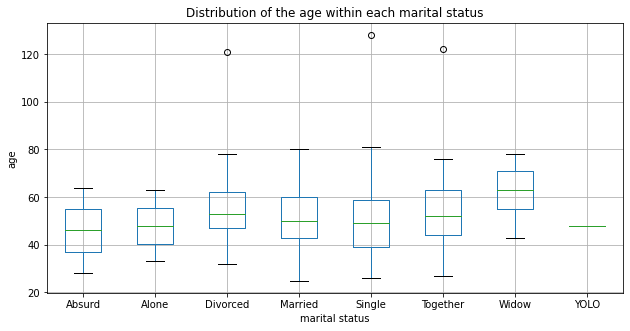

In [8]:
# calculate age with respect to year of birth and add new col to dataframe
now = datetime.datetime.now()
current_year = now.year

df['age'] = current_year - df.year_of_birth

# find out the different marital statuses in the data frame
unique_marital_status = df.marital_status.unique()
print(unique_marital_status)

# create boxplots for each
df[['marital_status', 'age']].boxplot(by='marital_status', column='age', figsize=(10, 5))
plt.title('Distribution of the age within each marital status')
plt.suptitle('')
plt.ylabel('age')
plt.xlabel('marital status')
plt.savefig('exports/1_1.pdf')
plt.show()

### 1.2 What is the distribution of the education?

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64


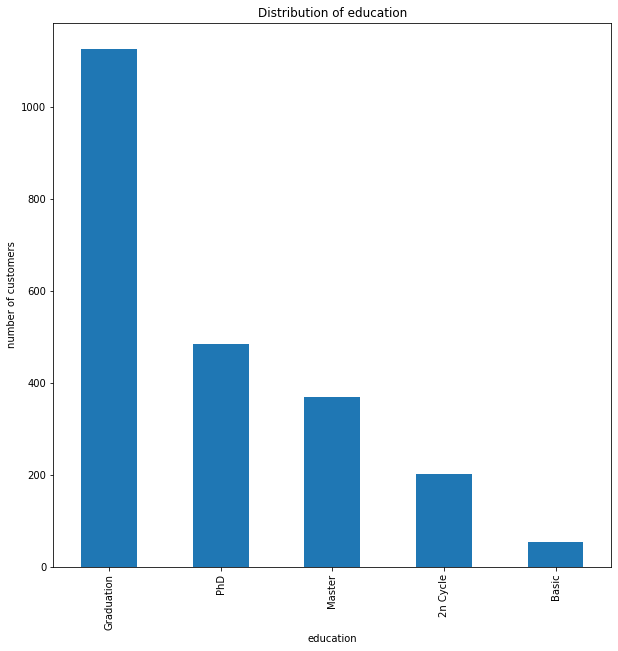

In [9]:
edu_distr = df.education.value_counts()
print(edu_distr)
edu_distr.plot(kind='bar', figsize=(10, 10))
plt.title('Distribution of education')
plt.suptitle('')
plt.ylabel('number of customers')
plt.xlabel('education')
plt.savefig('exports/1_2.pdf')

### 1.3 Which country has the most web purchases?


web_purchases    4382
Name: SP, dtype: int64


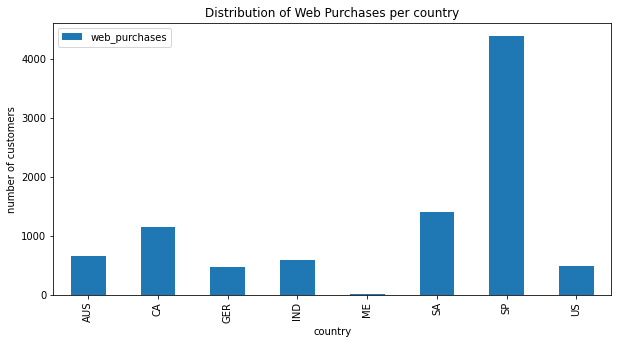

In [10]:
wp_per_country = df[['web_purchases', 'country']].groupby('country').sum()
print(wp_per_country.loc[wp_per_country['web_purchases'].idxmax()])
wp_per_country.plot(kind='bar', figsize=(10, 5))
plt.title('Distribution of Web Purchases per country')
plt.suptitle('')
plt.ylabel('number of customers')
plt.xlabel('country')
plt.savefig('exports/1_3.pdf')

### 1.4 How does the average customer look like?

In [11]:
from datetime import timedelta

# birthyear
avg_year = df.year_of_birth.mean()
print('Birthyear: ' + str(round(avg_year, 0)))

# age
avg_age = df.age.mean()
print('Age: ' + str(round(avg_age, 0)))

# education
max_edu = edu_distr.idxmax()
print('Education: ' + str(max_edu))

# marital status
# get max count marital status value
ms_distr = df.marital_status.value_counts()
max_ms = ms_distr.idxmax()
print('Marital Status: ' + str(max_ms))

# income
# convert objects to floats
df['income_float'] = df.income.str.replace('[\$,]', '', regex=True).astype(float)
# calc mean
avg_inc = df.income_float.mean()
print('Income: ' + str(round(avg_inc, 2)))

# kids
avg_kids = df.kids.mean()
print('Kids: ' + str(round(avg_kids, 2)))

# teens
avg_teens = df.teens.mean()
print('Teens: ' + str(round(avg_teens, 2)))

# customer since
# convert objects to datetime
df['customer_since_date_obj'] = pd.to_datetime(df.customer_since)
# calc days of customership since date
days_cust_since_today_df = (now - df.customer_since_date_obj).dt.days
# avg days
avg_d_cust_since = round(days_cust_since_today_df.mean(), 0)
# calc back to date
avg_date_cust_since = now - timedelta(avg_d_cust_since)
print('Customer since: ' + str(avg_date_cust_since.strftime('%d.%m.%Y')))

# last purchase in days
avg_purch_in_days = df.last_purchase_in_days.mean()
print('Last purchase in days: ' + str(round(avg_purch_in_days, 2)))

# web purchases
avg_web_purch = df.web_purchases.mean()
print('Web purchases: ' + str(round(avg_web_purch, 2)))

# catalog purchases
avg_cat_purch = df.catalog_purchases.mean()
print('Catalog purchases: ' + str(round(avg_cat_purch, 2)))

# store purchases
avg_store_purch = df.store_purchases.mean()
print('Store purchases: ' + str(round(avg_store_purch, 2)))

# web visits
avg_web_vis = df.web_visits.mean()
print('Web visits: ' + str(round(avg_web_vis, 2)))

# campaigns
# assuming the numbers are binary indicates whether a customer was accquired or not, missing domain knowledge / data-origin here
# prepare campaign data
campaign_dict = {'Campaign-Nr': [1, 2, 3, 4, 5], 'successful_accquired_customers': [df.campaign1.sum(),
                                                                                    df.campaign2.sum(),
                                                                                    df.campaign3.sum(),
                                                                                    df.campaign4.sum(),
                                                                                    df.campaign5.sum()]}
# create df
campaign_df_sum = pd.DataFrame(data=campaign_dict)
# find out amount of customers, accquired through campaigns
sum_of_accquired_cust_through_camp = campaign_df_sum.successful_accquired_customers.sum()
print('>>Customers accquired through campaigns: ' + str(sum_of_accquired_cust_through_camp))
print('>>Customers not accquired through campaigns: ' + str((len(df.index) - sum_of_accquired_cust_through_camp)))
print('Customer was not accquired through a campaign')

# country
country_distr = df.country.value_counts()
print('Country: ' + country_distr.idxmax())

Birthyear: 1969.0
Age: 52.0
Education: Graduation
Marital Status: Married
Income: 52247.25
Kids: 0.44
Teens: 0.51
Customer since: 10.07.2013
Last purchase in days: 49.11
Web purchases: 4.08
Catalog purchases: 2.66
Store purchases: 5.79
Web visits: 5.32
>>Customers accquired through campaigns: 667
>>Customers not accquired through campaigns: 1573
Customer was not accquired through a campaign
Country: SP


### 1.5 Which previous marketing campaign was most successful?

Best campaign was nr: 4
   Campaign-Nr  successful_accquired_customers
0            1                             144
1            2                              30
2            3                             163
3            4                             167
4            5                             163


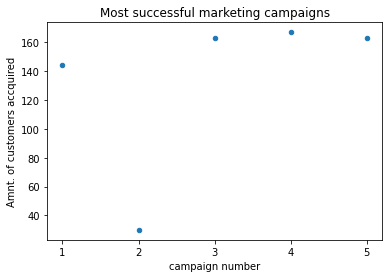

In [12]:
max_campaign = campaign_df_sum.loc[campaign_df_sum['successful_accquired_customers'].idxmax()]
print('Best campaign was nr: ' + str(max_campaign['Campaign-Nr']))
plt_camp = campaign_df_sum.plot(kind='scatter', x='Campaign-Nr', y='successful_accquired_customers',
                                ylabel='Amnt. of customers accquired')
plt_camp.set_xticks(range(1, 6))
print(campaign_df_sum)
plt.title('Most successful marketing campaigns')
plt.suptitle('')
plt.xlabel('campaign number')
plt.savefig('exports/1_5.pdf')
plt.show()

## Task 2: Monthly revenues


  Branch  Week 1  Week 2  Week 3  Week 4  Week 5  Week 6  Week 7  Week 8  \
0     F1   10047   10033   10057   10130   10051    9983    9923    9987   
1     F2   11785   11727   12098   11740   11453   11643   11726   12257   
2     F3    9048    9127    9133    9098    9132    9127    9080    9164   
3     F4   11917   12179   12584   12630   12674   12897   12498   13000   

   Week 9  ...  Week 91  Week 92  Week 93  Week 94  Week 95  Week 96  \
0   10070  ...    10561    10522    10477    10498    10463    10446   
1   12641  ...    11000    11310    11201    11431    11111    10932   
2    9261  ...    10450    10536    10490    10521    10553    10518   
3   12271  ...     9612     9731     9941     9700    10000    10200   

     Week 97  Week 98  Week 99  Week 100  
0  10383.000    10399    10359     10328  
1  11212.123    10800    10941     11023  
2  10570.000    10567    10623     10666  
3  10112.000    10312    10431     10478  

[4 rows x 101 columns]
Branch       object

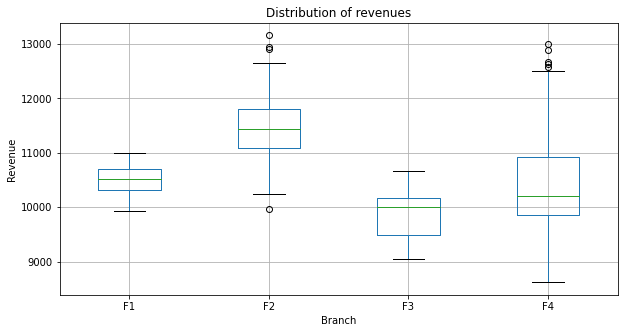

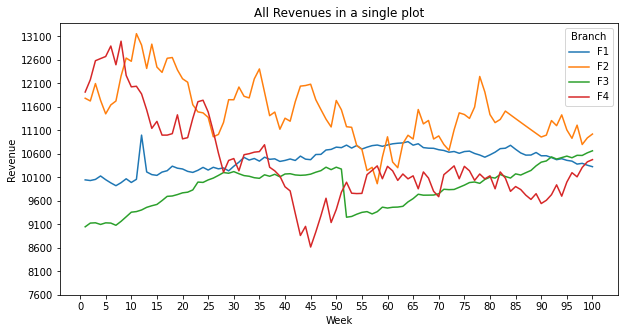

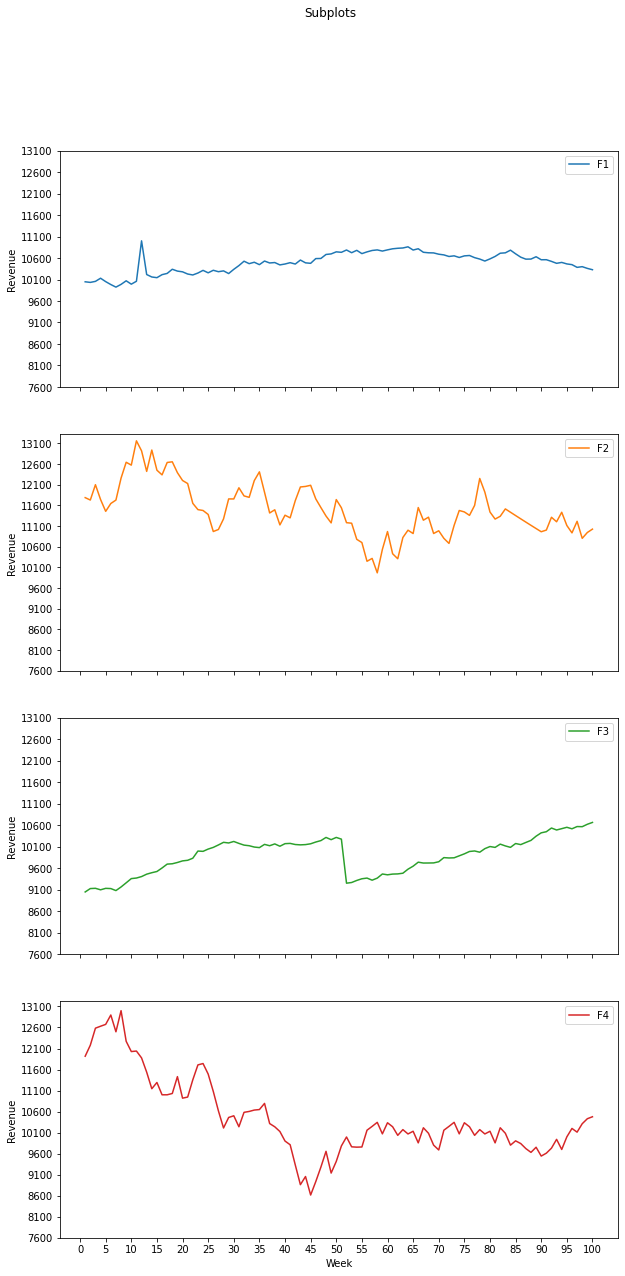

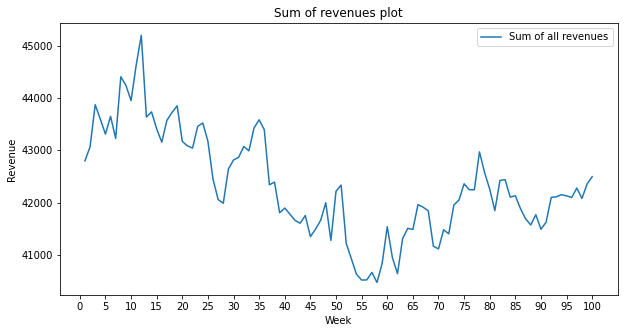

In [13]:
import numpy as np
import math

mr_df = pd.read_csv('data/revenues.csv')
# check how the data looks
print(mr_df.head())
# check data types
print(mr_df.dtypes)

# drop branch first column and switch rows and cols
mr_df_col_drop = mr_df.drop(columns='Branch', axis=1)

# remove the 'Week'-prefix and convert it to integers
mr_df_col_drop.columns = pd.to_numeric(mr_df_col_drop.columns.str.replace('Week ', ''))

# max  and min revunue value
max_rev = mr_df_col_drop.T.max().max()
min_rev = mr_df_col_drop.T.min().min()
lower_bound_chart_rev = math.floor((min_rev - 1000) / 100) * 100

# boxplot
mr_df_col_drop.index = mr_df['Branch']
bplot = mr_df_col_drop.T.boxplot(figsize=(10, 5))
bplot.set_ylabel('Revenue')
bplot.set_xlabel('Branch')
bplot.set_title('Distribution of revenues')
plt.savefig('exports/2_1.pdf')

# plot all branches in a single plot
all_branches_plt = mr_df_col_drop.T.plot(
    xlabel='Week',
    ylabel='Revenue',
    figsize=(10, 5),
    xticks=np.arange(0, len(mr_df_col_drop.columns) + 1, step=5),
    yticks=np.arange(lower_bound_chart_rev, max_rev, step=500),
    title='All Revenues in a single plot')
plt.savefig('exports/2_2.pdf')

# sub line plots
sep_branches_plt = mr_df_col_drop.T.plot(
    xlabel='Week',
    ylabel='Revenue',
    figsize=(10, 20),
    xticks=np.arange(0, len(mr_df_col_drop.columns) + 1, step=5),
    yticks=np.arange(lower_bound_chart_rev, max_rev, step=500),
    subplots=True,
    title='Subplots'
)
plt.savefig('exports/2_3.pdf')

# overall revenue
mr_df_with_branchnames = mr_df_col_drop.copy()
mr_df_with_branchnames = mr_df_with_branchnames.append(mr_df_with_branchnames.sum(numeric_only=True), ignore_index=True)
all_revenues = mr_df_with_branchnames.iloc[[-1]].T
all_revenues = all_revenues.rename(columns={4: 'Sum of all revenues'})
all_revenues.plot(
    xlabel='Week',
    ylabel='Revenue',
    xticks=np.arange(0, len(mr_df_col_drop.columns) + 1, step=5),
    figsize=(10, 5),
    title='Sum of revenues plot')
plt.savefig('exports/2_4.pdf')

## Task 3: Production lines

In [14]:
pl1_df = pd.read_csv('data/production_line1.csv')  #  9.000 entries
pl2_df = pd.read_csv('data/production_line2.csv')  #  5.000 entries
pl3_df = pd.read_csv('data/production_line3.csv')  # 12.000 entries
# concat to a single df
frames = [pl1_df, pl2_df, pl3_df]
pl_df = pd.concat(frames)

### 3.1 Speed

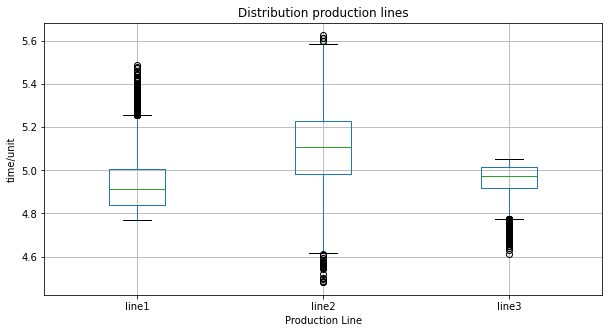

Mean production times per unit:

line1    4.937433
line2    5.100732
line3    4.960518
dtype: float64
Lowest mean production times per unit:

4.9374328310594775


In [15]:
pl_df.boxplot(figsize=(10, 5))
plt.title('Distribution production lines')
plt.xlabel('Production Line')
plt.ylabel('time/unit')
plt.savefig('exports/3_1.pdf')
plt.show()
print('Mean production times per unit:\n')
print(pl_df.mean())
print('Lowest mean production times per unit:\n')
print(pl_df.mean().min())

### 3.2 Just-in-time

In [16]:
print('Standard deviation of production times per unit:\n')
print(pl_df.std())
print('Lowest standard deviation of production times per unit:\n')
print(pl_df.std().min())

Standard deviation of production times per unit:

line1    0.119258
line2    0.180232
line3    0.069642
dtype: float64
Lowest standard deviation of production times per unit:

0.06964246270255614


### 3.3 Boxplots vs. Violinplots

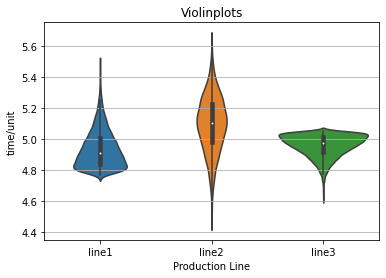

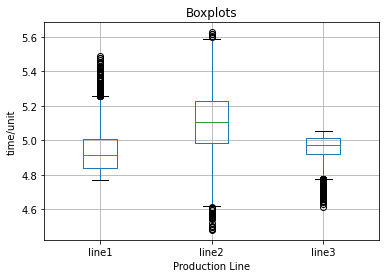

In [17]:
# violinplots
import seaborn as sns

fig, axes = plt.subplots()
sns.violinplot(data=pl_df, ax=axes)
axes.set_title('Violinplots')

axes.yaxis.grid(True)
axes.set_ylabel('time/unit')
axes.set_xlabel('Production Line')
plt.savefig('exports/3_2.pdf')
plt.show()

# boxplots
pl_df.boxplot()
plt.title('Boxplots')
plt.xlabel('Production Line')
plt.ylabel('time/unit')
plt.savefig('exports/3_3.pdf')
plt.show()